# Exercício 5

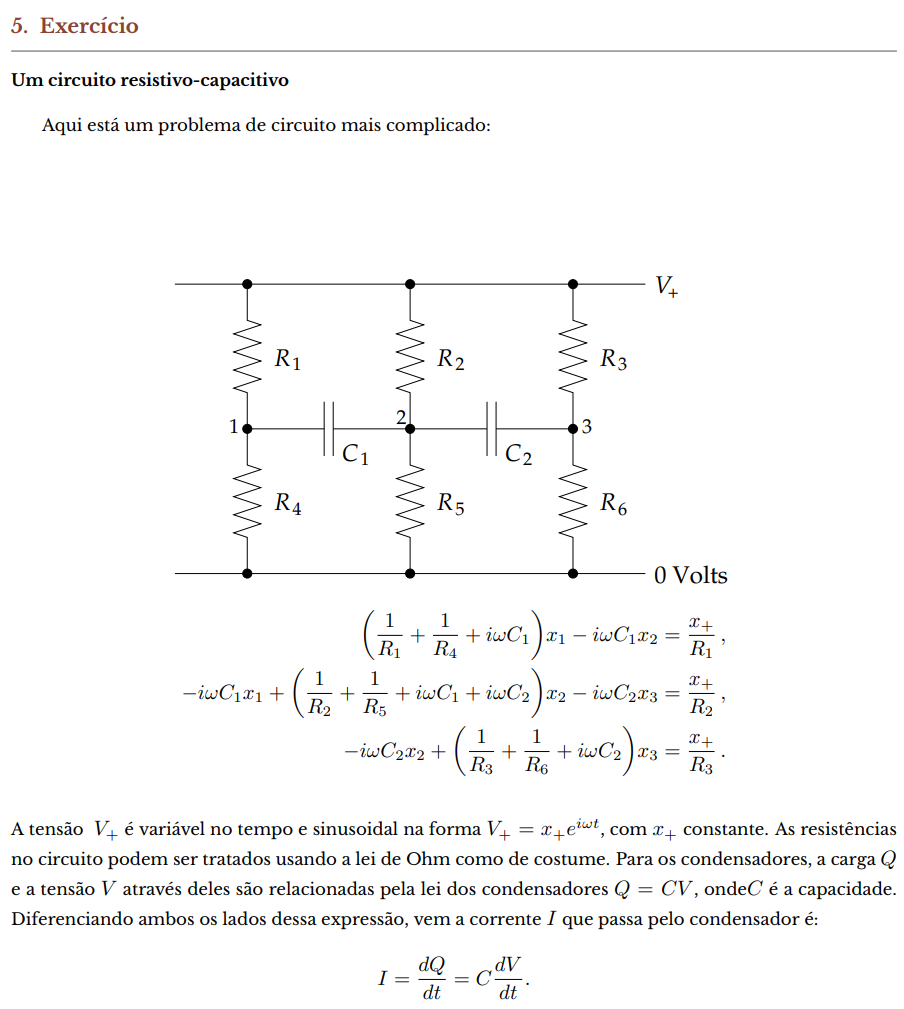
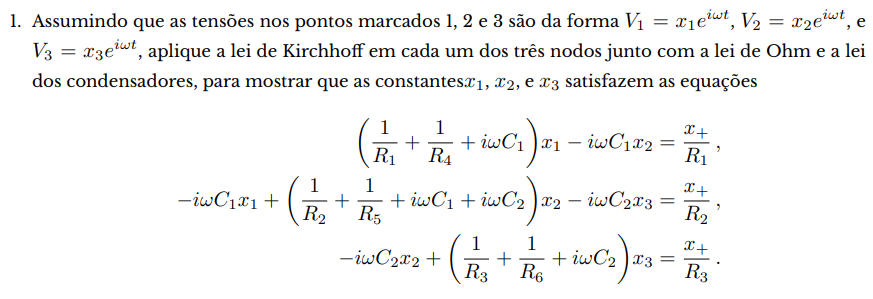
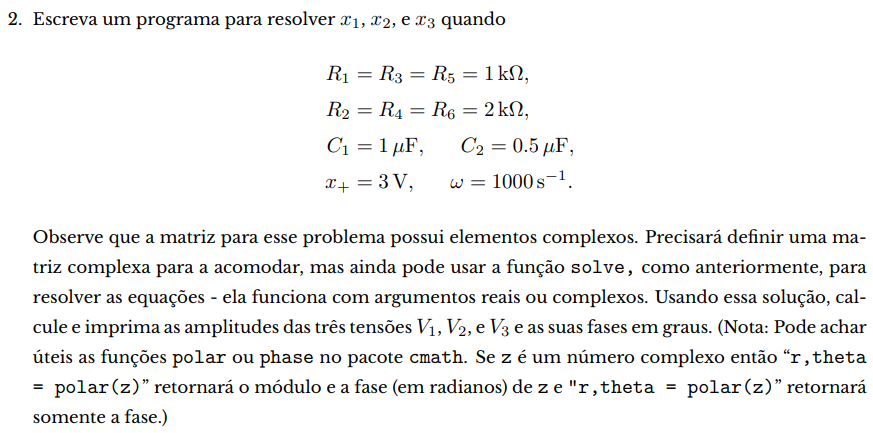

In [4]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

# Alínea 1

Usando a lei dos nodos:

$$
\begin{cases}
\left(\frac{V_+ - V_1}{R_1}\right) + C_1\frac d{dt}(V_2-V_1) + \left(\frac{0 - V_1}{R_4}\right) = 0
\\\\
\left(\frac{V_+ - V_2}{R_2}\right) + C_2\frac d{dt}(V_3-V_2) + C_1\frac d{dt}(V_1-V_2) + \left(\frac{0 - V_2}{R_5}\right) = 0
\\\\
\left(\frac{V_+ - V_3}{R_3}\right) + C_2\frac d{dt}(V_2-V_3) + \left(\frac{0 - V_3}{R_6}\right) = 0
\end{cases}
$$

Este sistema é equivalente ao do enunciado!

## Alínea 2

In [5]:
def problema(R: list, C: list, xp: float, omega: float):
    """
        Gerar a matriz associada ao problema.
    """
    A = np.array([
        [1/R[1] + 1/R[4] + 1j * omega * C[1], -1j * omega * C[1], 0],
        [-1j * omega * C[1], 1/R[2] + 1/R[5] + 1j * omega * C[1] + 1j * omega * C[2], -1j * omega * C[2]],
        [0, -1j * omega * C[2], 1/R[3] + 1/R[6] + 1j * omega * C[2]]
    ])

    bb = np.array([xp/R[1], xp/R[2], xp/R[3]])

    return A, bb

In [8]:
from cmath import polar

# Resolver o problema
R = [0, 1000, 2000, 1000, 2000, 1000, 2000]
C = [0, 1e-06, 0.5e-06]
xp = 3
omega = 1000

A, bb = problema(R, C, xp, omega)

xx = np.linalg.solve(A, bb)
for i in range(3):
    print(f"O valor de V{i+1} tem módulo {polar(xx[i])[0]:.3f} e fase {polar(xx[i])[1] * 180 / np.pi:.3f} graus")

O valor de V1 tem módulo 1.701 e fase -5.469 graus
O valor de V2 tem módulo 1.481 e fase 11.583 graus
O valor de V3 tem módulo 1.861 e fase -4.165 graus
